VERİ ANALİZİ ÇALIŞMASI PENGUENLER ÜZERİNE

İçeri kütüphane aktarma

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
#Terminalden piplemeyi unutma! pip install palmerpenguin numpy panda seaborn matplotlib empiricaldist...

VERİLERİ YÜKLEME

Palmerpenguins paketini kullanma

In [15]:
#işlenmemiş veri
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Daha önce işlenmiş veriler

In [14]:
preprocessed_penguins_df = palmerpenguins.load_penguins()
preprocessed_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Seaborn veri kümelerini kullanma

In [16]:
preprocessed_penguins_df = sns.load_dataset("penguins")
preprocessed_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Veri setindeki null değerleri ve oranları

In [17]:

penguins_missing = (
    preprocessed_penguins_df.isnull()
    .melt(value_name='missing')
)

penguins_missing

,variable,missing
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2403,sex,True
2404,sex,False
2405,sex,False
2406,sex,False


Grafiğe dökersek

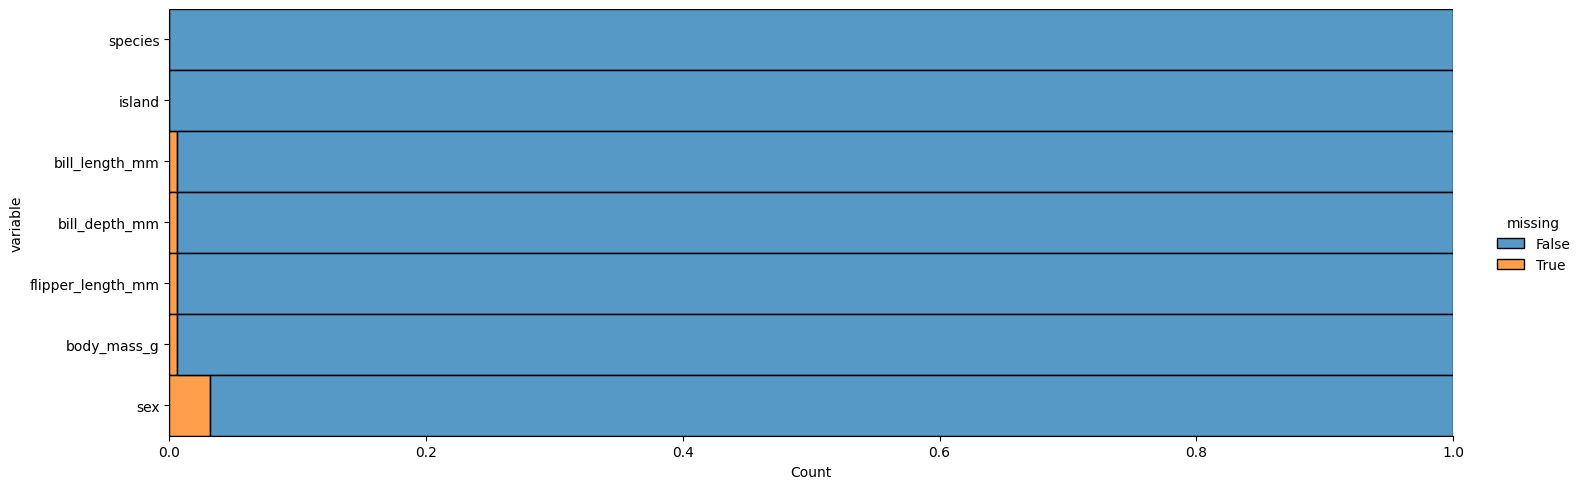

In [18]:
sns.displot(
    data=penguins_missing,
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=3
    )

Veri setindeki tüm null değerleri görüntüleme

In [6]:

(
    preprocessed_penguins_df
    .isnull()
    .transpose() # Transpozunu aldık isteğe bağlı daha rahat görmek için
)

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
species,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
island,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
bill_depth_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
flipper_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
body_mass_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
sex,False,False,False,True,False,False,False,False,True,True,...,False,False,True,False,False,True,False,False,False,False


<AxesSubplot: >

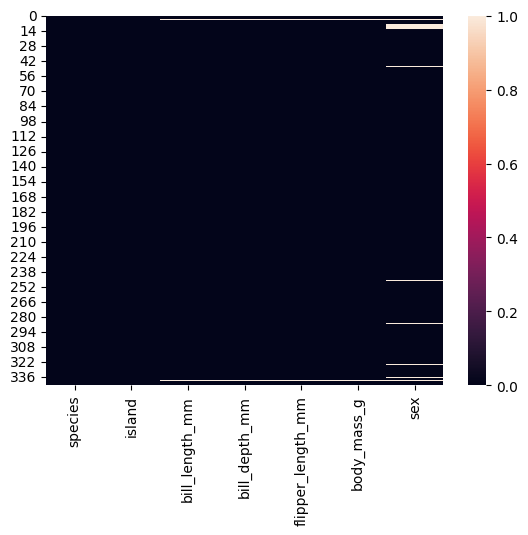

In [7]:
(
    preprocessed_penguins_df
    .isnull()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)
     

ORANLAR NASIL GÖRSELLEŞTİRİLİR?

In [25]:
processed_penguins_df = (
    preprocessed_penguins_df
    .dropna()
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [29]:
#değişkenleri tanımlayalım
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

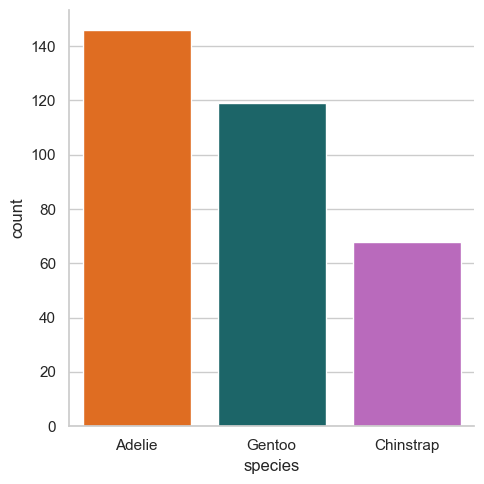

In [28]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color,
    order=processed_penguins_df.value_counts('species', sort=True).index #En yüksekten düşüğe sıralama
)

ADALARA VE CİNSİYETLERE GÖRE GÖRSELLEŞTİRME

In [30]:
processed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [31]:
island_count = processed_penguins_df.value_counts('island', sort=True).reset_index(name='count')
island_count["variable"] = ""
island_count

,island,count,variable
0,Biscoe,163,
1,Dream,123,
2,Torgersen,47,


In [32]:
sex_count = processed_penguins_df.value_counts('sex', sort=True).reset_index(name='count')
sex_count["variable"] = ""
sex_count

,sex,count,variable
0,Male,168,
1,Female,165,


In [33]:
#YARDIMCI FONKSİYON GRAFİKLER İÇİN
def create_bottom_list(serie: pd.Series) -> list:
  bottom_list = []

  for i in range(len(serie)):
    if len(bottom_list) == 0:
      bottom_list.append(0)
      bottom_list.append(serie[i])
      continue
    else:
      bottom_list.append(serie[i] + bottom_list[i])

  bottom_list.pop()

  return bottom_list

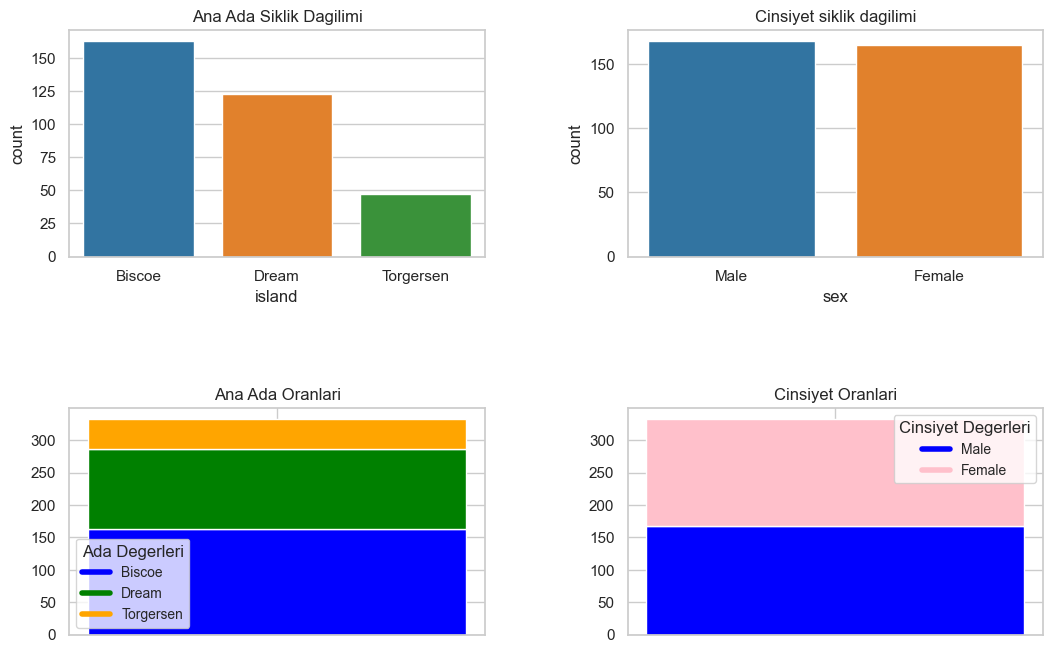

In [36]:
#Grafiklerin şekil yapısı
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(12, 8))

# Grafikleri özelleştiriyorum
ax1.set_title('Ana Ada Siklik Dagilimi')
ax2.set_title('Cinsiyet siklik dagilimi')
ax3.set_title('Ana Ada Oranlari')
ax4.set_title('Cinsiyet Oranlari')

# içerik ekliyorum
sns.barplot(data=island_count,
            x="island" ,
            y="count",
            ax=ax1)

sns.barplot(data=sex_count,
            x="sex" ,
            y="count",
            ax=ax2)

# Ada değerleri için renkler ekliyorum
colores_island = {'Biscoe': 'blue',
           'Dream': 'green',
           'Torgersen': 'orange'}

bottom_list = create_bottom_list(island_count["count"])

ax3.bar(data=island_count,
        x="variable",
        height="count",
        width=0.1,
        label="island",
        color=island_count['island'].map(colores_island),
        bottom=bottom_list)

# Renler için gösterge oluşturuyorum
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in colores_island.items()]
ax3.legend(handles=legend_labels, title="Ada Degerleri", fontsize="small")

# Cinsiyet dgerleri için renk oluşturuyorum
colores_sex = {'Male': 'blue',
           'Female': 'pink',}

bottom_list = create_bottom_list(sex_count["count"])

ax4.bar(data=sex_count,
        x="variable",
        height="count",
        width=0.1,
        label="sex",
        color=sex_count['sex'].map(colores_sex),
        bottom=bottom_list)

# Renkler için gösterge oluşturma
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in colores_sex.items()]
ax4.legend(handles=legend_labels, title="Cinsiyet Degerleri", fontsize="small")

# Boşlukları ayarlama
plt.tight_layout(pad=5.0)

# şekli çıkarma
plt.show()
